## Importing the Half-Wave Rectifier Data from the excel sheet

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_excel("vpp_varying-resistor.xlsx")
df.index += 1



df

,Resistors (Ohms),Reading 1,Reading 2,Reading 3,Reading 4,Reading 5,Average
1,100,7.80,7.76,7.84,7.84,7.88,7.82
2,470,3.36,3.40,3.38,3.36,3.36,3.37
3,560,3.06,3.06,3.14,3.04,3.06,3.07
4,1000,2.10,2.10,2.08,2.10,2.12,2.10
5,2200,1.52,1.54,1.54,1.56,1.54,1.54
6,5600,1.10,1.12,1.14,1.14,1.16,1.13
7,100000,0.84,0.88,0.92,0.96,1.00,0.92


## Calculating the Standard Error for each resistor using Numpy

In [3]:

data = {
    100: [7.8, 7.76, 7.84, 7.84, 7.88],
    470: [3.36, 3.4, 3.38, 3.36, 3.36],
    560: [3.06, 3.06, 3.14, 3.04, 3.06],
    1000: [2.1, 2.1, 2.08, 2.1, 2.12],
    2200: [1.52, 1.54, 1.54, 1.56, 1.54],
    5600: [1.1, 1.12, 1.14, 1.14, 1.16],
    100000: [0.84, 0.88, 0.92, 0.96, 1.0]
}

stderror = []

# calculating the standard error which is standard deviation/square root of number of readings
standard_errors = {resistor: np.std(readings) / np.sqrt(len(readings)) for resistor, readings in data.items()}

for resistor, se in standard_errors.items():
    print(f"Resistor {resistor} Ohms: Standard Error = {se:.4f}")
    stderror.append(round(se, 4))


df
stderror


Resistor 100 Ohms: Standard Error = 0.0182
Resistor 470 Ohms: Standard Error = 0.0072
Resistor 560 Ohms: Standard Error = 0.0156
Resistor 1000 Ohms: Standard Error = 0.0057
Resistor 2200 Ohms: Standard Error = 0.0057
Resistor 5600 Ohms: Standard Error = 0.0091
Resistor 100000 Ohms: Standard Error = 0.0253


[0.0182, 0.0072, 0.0156, 0.0057, 0.0057, 0.0091, 0.0253]

## Graphing Resistor vs Average

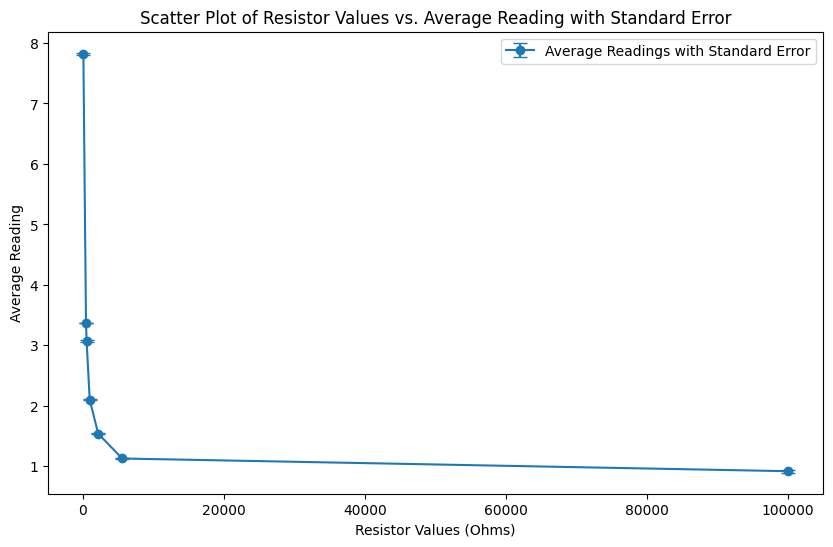

In [6]:
df['Standard Error'] = stderror


# Extracting the resistor values and readings from the DataFrame
resistors = df['Resistors (Ohms)'].values
readings = df[['Reading 1', 'Reading 2', 'Reading 3', 'Reading 4', 'Reading 5']].values

# Calculate the averages
averages = df['Average'].values
# Define a model function
def model(x, a, b):
    return a * np.log(x) + b

# Fit the model to the data
# params, _ = curve_fit(model, resistors, averages)

# Generate fitted values
# fitted_values = model(resistors, *params)

# Create the scatter plot
plt.style.use('default')
plt.figure(figsize=(10, 6))
plt.errorbar(resistors, averages, yerr=df['Standard Error'], fmt='o', capsize=5, label='Average Readings with Standard Error', linestyle="-")
# plt.plot(resistors, fitted_values, color='red', label='Best Fit Curve')

# plt.xscale('log')
plt.xlabel('Resistor Values (Ohms)')
plt.ylabel('Average Reading')
plt.title('Scatter Plot of Resistor Values vs. Average Reading with Standard Error')
# plt.grid(True, which="both", ls="--")


plt.legend()
plt.show()  

## Append average into dataframe

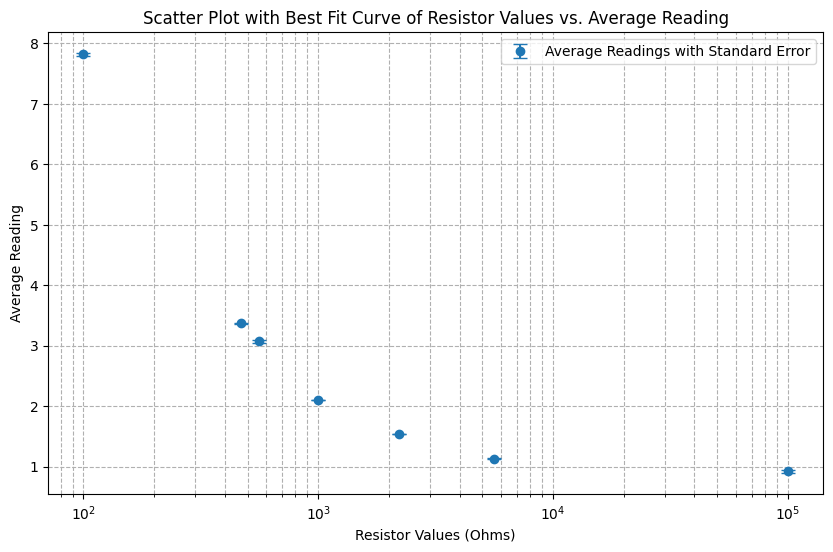

In [5]:
from scipy.optimize import curve_fit

# Define a model function to fit the data
def model(x, a, b):
    return a * np.log(x) + b

# Fit the curve to the data
params, _ = curve_fit(model, resistors, averages)

# Generate fitted values
fitted_values = model(resistors, *params)

# Create the scatter plot with the curve of best fit
plt.figure(figsize=(10, 6))
plt.errorbar(resistors, averages, yerr=standard_errors, fmt='o', capsize=5, label='Average Readings with Standard Error')
# plt.plot(resistors, fitted_values, color='red', label='Best Fit Curve')

plt.xscale('log')
plt.xlabel('Resistor Values (Ohms)')
plt.ylabel('Average Reading')
plt.title('Scatter Plot with Best Fit Curve of Resistor Values vs. Average Reading')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()

## Graphing Alternating Current

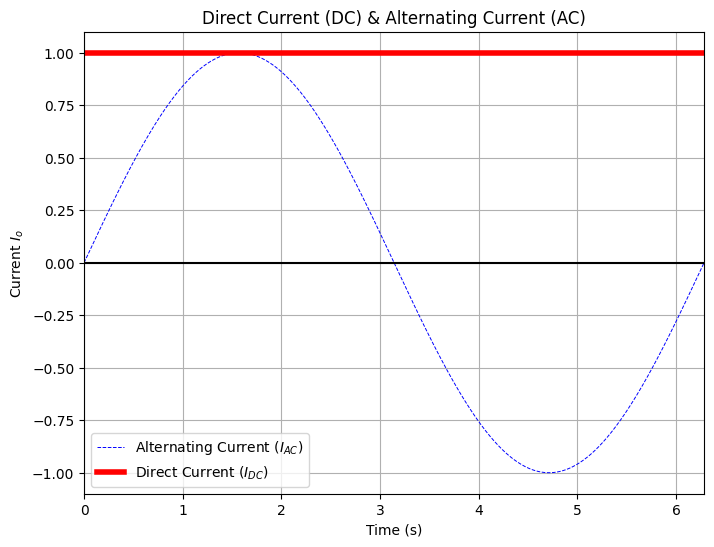

In [6]:
# Create the plot with the updated title and y-axis label
x = np.linspace(0, 2 * np.pi, 1000)
y = np.sin(x)
y_dc = np.ones_like(x) * 1 
plt.figure(figsize=(8, 6))
plt.plot(x, y, label="Alternating Current ($I_{AC}$)", color="blue", linestyle="--", linewidth=0.7)
plt.plot(x, y_dc, label="Direct Current ($I_{DC}$)", color="red", linewidth=4.0)



# Set x-axis and y-axis labels
plt.xlabel("Time (s)")
plt.ylabel("Current $I_{o}$")

# Set x-axis at 0.00
plt.axhline(y=0, color='black', linewidth=1.5)

plt.xlim([0, 2 * np.pi])


# Add updated title and grid
plt.title("Direct Current (DC) & Alternating Current (AC)")
plt.grid(True)
plt.legend()

# Show the plot
plt.show()
